In [1]:
version


               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [2]:
library(abc)
require(abc.data)


Loading required package: abc.data

Loading required package: nnet

Loading required package: quantreg

Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve


Loading required package: MASS

Loading required package: locfit

locfit 1.5-9.7 	 2023-01-02



In [3]:
help(package="abc")
help(abc)


Documentation for package 'abc'


		Information on package 'abc'

Description:

Package:            abc
Type:               Package
Title:              Tools for Approximate Bayesian Computation (ABC)
Version:            2.2.1
Date:               2022-05-17
Authors@R:          c( person("Csillery", "Katalin", role = "aut",
                    email="kati.csillery@gmail.com"), person("Lemaire",
                    "Louisiane", role = "aut"), person("Francois",
                    "Olivier", role = "aut"), person("Blum", "Michael",
                    email = "michael.blum.temp@gmail.com", role =
                    c("aut", "cre")))
Depends:            R (>= 2.10), abc.data, nnet, quantreg, MASS, locfit
Description:        Implements several ABC algorithms for performing
                    parameter estimation, model selection, and
                    goodness-of-fit.  Cross-validation tools are also
                    available for measuring the accuracy of ABC
                    es


abc> require(abc.data)

abc> data(musigma2)

abc> ?musigma2


starting httpd help server ...
 done




abc> ## The rejection algorithm
abc> ##
abc> rej <- abc(target=stat.obs, param=par.sim, sumstat=stat.sim, tol=.1, method =
abc+ "rejection") 

abc> ## ABC with local linear regression correction without/with correction
abc> ## for heteroscedasticity 
abc> ##
abc> lin <- abc(target=stat.obs, param=par.sim, sumstat=stat.sim, tol=.1, hcorr =
abc+ FALSE, method = "loclinear", transf=c("none","log"))

abc> linhc <- abc(target=stat.obs, param=par.sim, sumstat=stat.sim, tol=.1, method =
abc+ "loclinear", transf=c("none","log")) 

abc> ## posterior summaries
abc> ##
abc> linsum <- summary(linhc, intvl = .9)
Call: 
abc(target = stat.obs, param = par.sim, sumstat = stat.sim, tol = 0.1, 
    method = "loclinear", transf = c("none", "log"))
Data:
 abc.out$adj.values (1000 posterior samples)
Weights:
 abc.out$weights

                         mu sigma2
Min.:                3.2091 0.0855
Weighted 5 % Perc.:  3.3250 0.1187
Weighted Median:     3.4198 0.1636
Weighted Mean:       3.4194 0.1674
Weighte

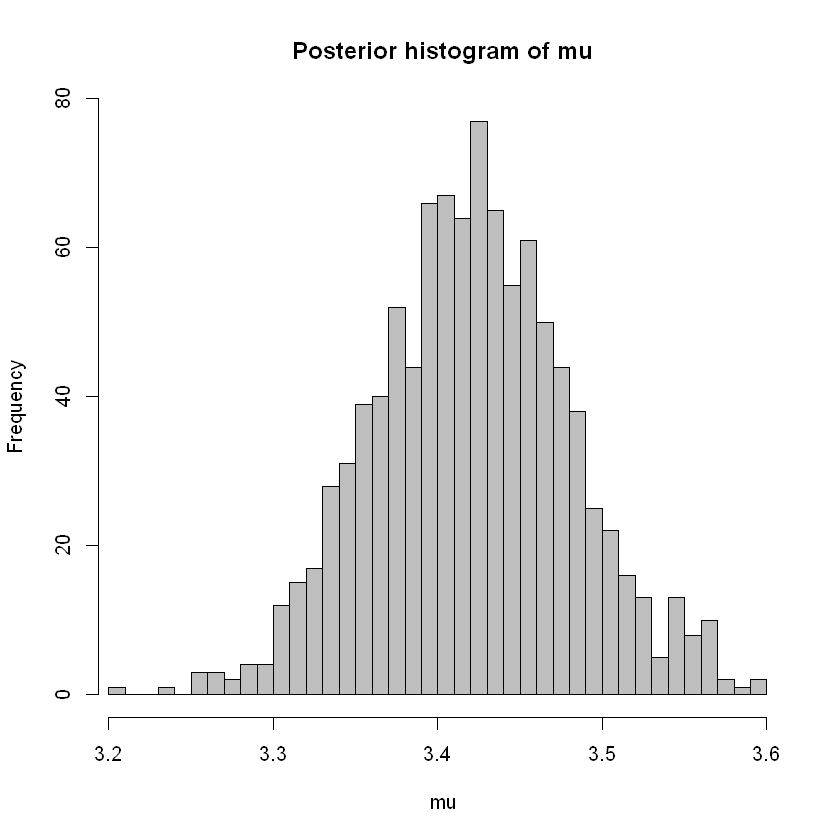


abc> ## or send histograms to a pdf file
abc> ## Not run: 
abc> ##D hist(linhc, file="linhc", breaks=30, caption=c(expression(mu),
abc> ##D expression(sigma^2)))
abc> ## End(Not run)
abc> ## diagnostic plots: compare the 2 'abc' objects: "loclinear",
abc> ## "loclinear" with correction for heteroscedasticity
abc> ##
abc> plot(lin, param=par.sim)


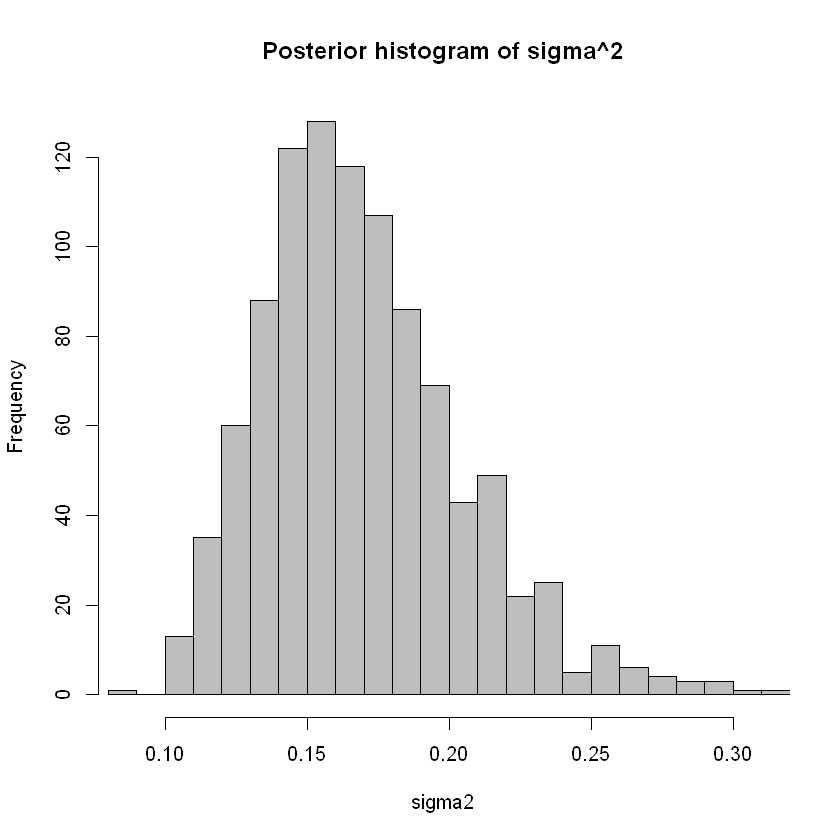

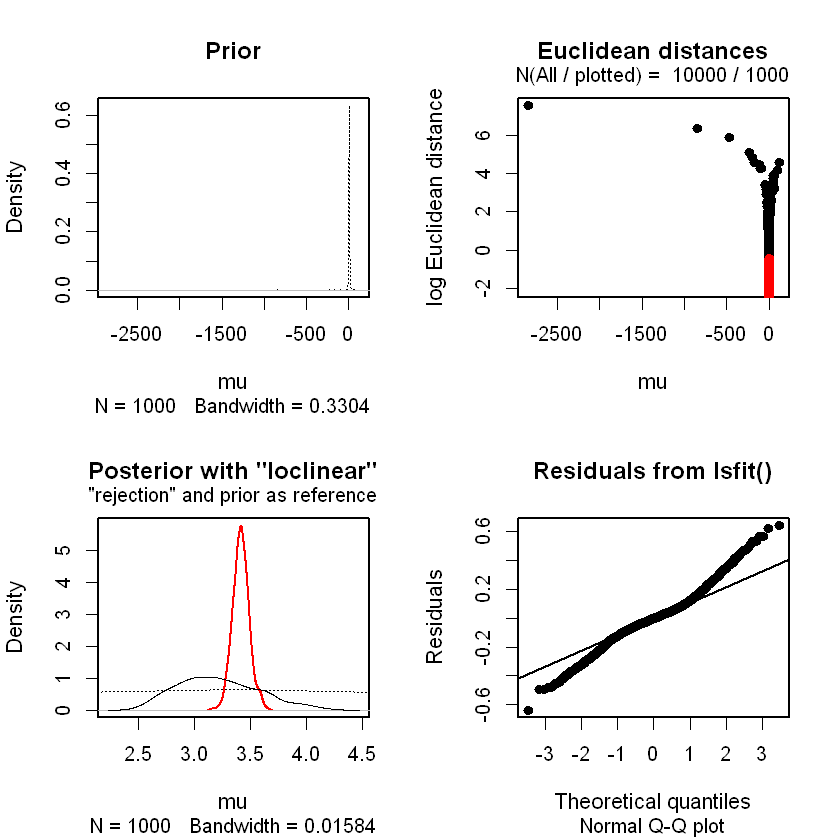


abc> plot(linhc, param=par.sim)


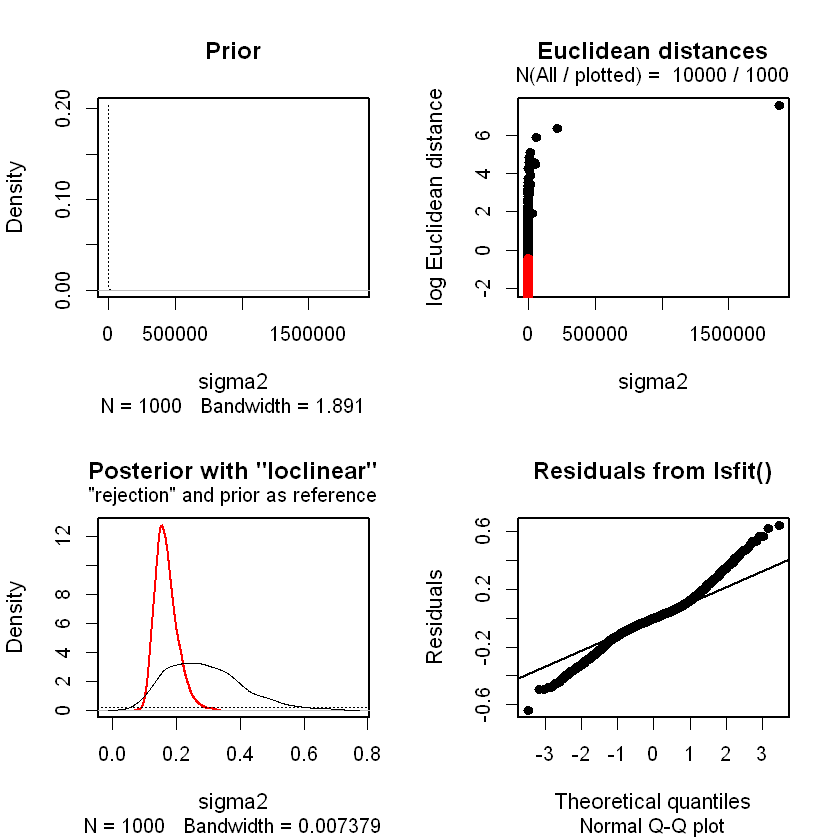

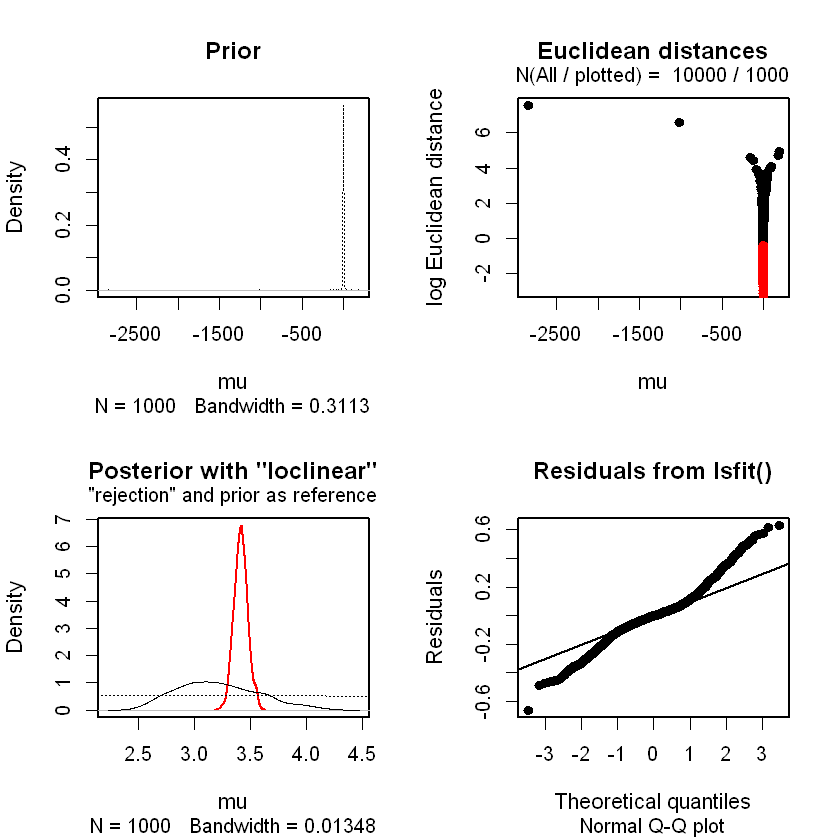


abc> ## example illustrates how to add "true" parameter values to a plot
abc> ##
abc> postmod <- c(post.mu[match(max(post.mu[,2]), post.mu[,2]),1],
abc+              post.sigma2[match(max(post.sigma2[,2]), post.sigma2[,2]),1])

abc> plot(linhc, param=par.sim, true=postmod)


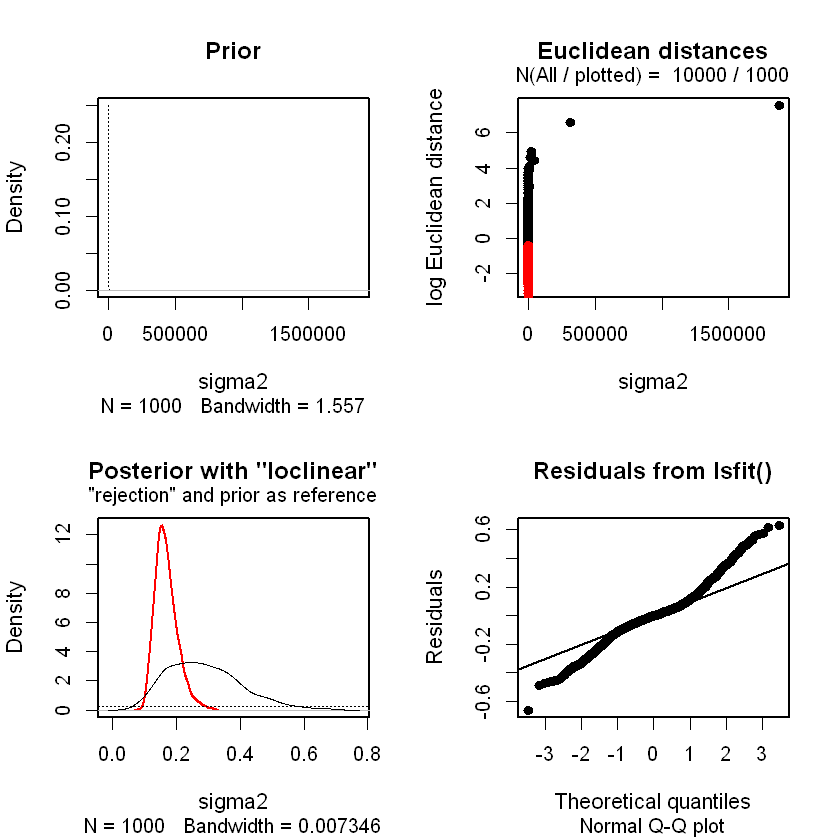

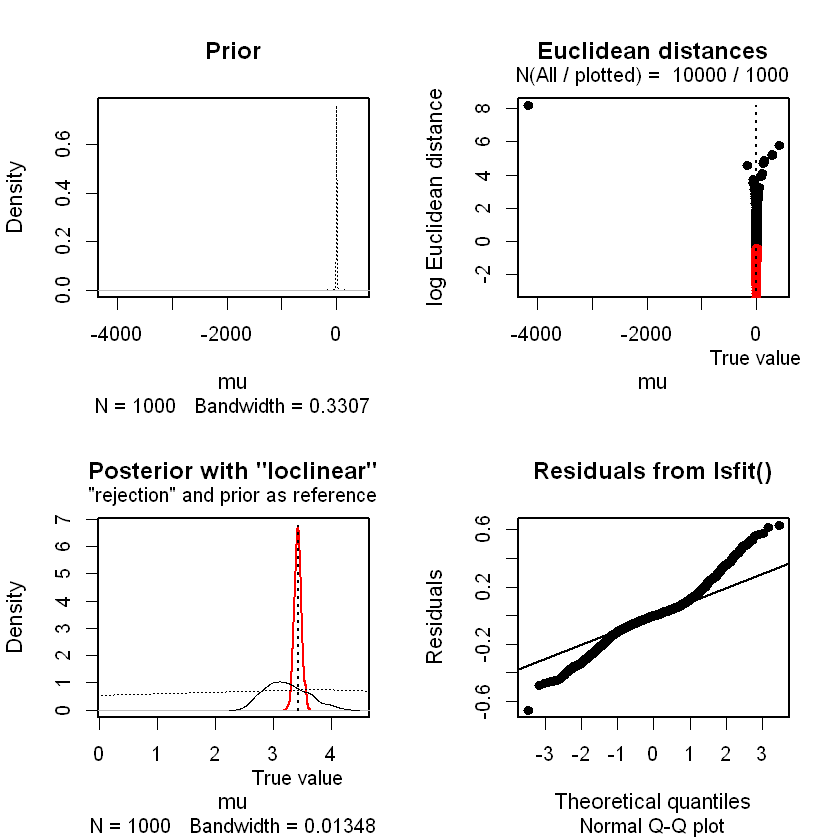


abc> ## artificial example to show how to use the logit tranformations
abc> ##
abc> myp <- data.frame(par1=runif(1000,-1,1),par2=rnorm(1000),par3=runif(1000,0,2))

abc> mys <- myp+rnorm(1000,sd=.1)

abc> myt <- c(0,0,1.5)

abc> lin2 <- abc(target=myt, param=myp, sumstat=mys, tol=.1, method =
abc+ "loclinear", transf=c("logit","none","logit"),logit.bounds = rbind(c(-1,
abc+ 1), c(NA, NA), c(0, 2)))

abc> summary(lin2)
Call: 
abc(target = myt, param = myp, sumstat = mys, tol = 0.1, method = "loclinear", 
    transf = c("logit", "none", "logit"), logit.bounds = rbind(c(-1, 
        1), c(NA, NA), c(0, 2)))
Data:
 abc.out$adj.values (100 posterior samples)
Weights:
 abc.out$weights

                          par1    par2    par3
Min.:                  -0.1744 -0.1707  1.2117
Weighted 2.5 % Perc.:  -0.1718 -0.1671  1.3048
Weighted Median:       -0.0176 -0.0115  1.5462
Weighted Mean:         -0.0089 -0.0091  1.5519
Weighted Mode:         -0.0418 -0.0415  1.5195
Weighted 97.5 % Perc.:  0.167

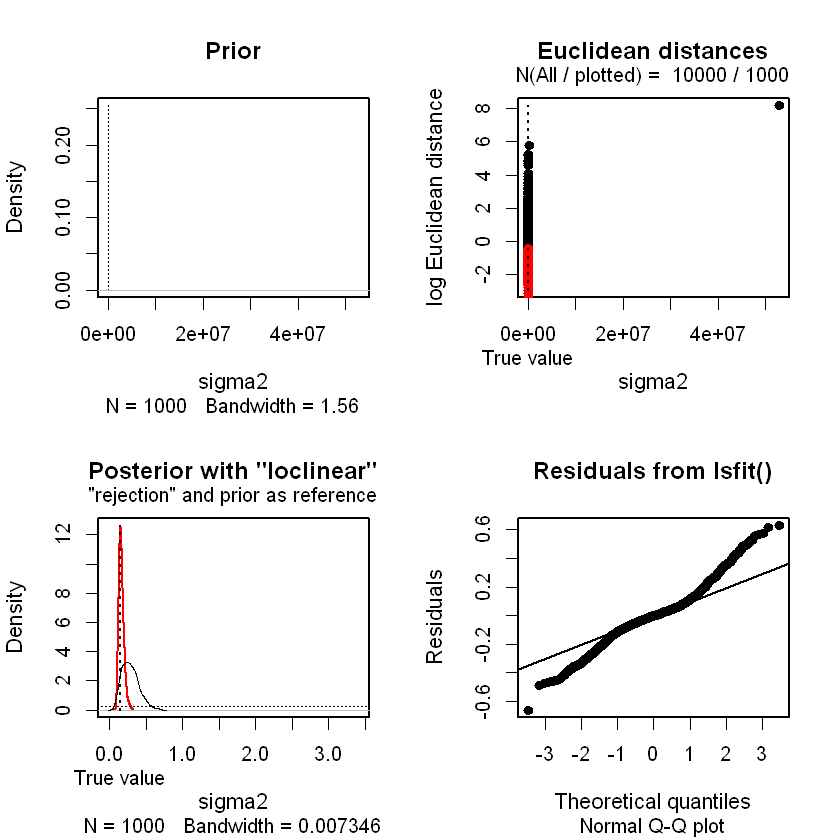

In [4]:
example(abc)

# Pruebas

Artículo: https://arxiv.org/abs/1806.08320

## Simulaciones

In [92]:
# Simular normal 0,1
sampleSize <- 1000;
data.obs <- rnorm(sampleSize, mean=0, sd=1);

In [123]:
# Función para calcular y guardar los estadísticos de resúmen
calc.stats <- function (x){
S <- c(mean(x), var(x), median(x), max(x), min(x), range(x),
quantile(x, probs=c(0.25, 0.75)));
names(S) <- c("mean", "var", "median", "min", "max", "range", "Q1", "Q3")
return(S);
}

In [124]:
# Calcula los estadísticos de resúmen para la data simulada
S.obs <- calc.stats(data.obs);
write.table(t(S.obs), file="normal.obs", quote=F, row.names=F);

We will next generate a large number (10,000) of simulations with parameter values drawn from prior distributions and calculate the associated summary statistics for each simulation. In order to allow for a direct comparison between the models, we will assume uniform prior distributions for the mean 𝜇 ∼ 𝑈[−1, 1] and variance 𝜎2 ∼ 𝑈[0.1, 4] for both models. We also set the internal random number seed generator equal to one so that the reader can reproduce exactly our results. Simulations for the normal model (Model A) are then generated as follows:

In [125]:
set.seed(1)
nsim <- 1000;
P.normal <- data.frame(mu=runif(nsim, min=-1, max=1), sigma2=runif(nsim, min=0.1 , max=4));
S.normal <- data.frame(matrix(data=0, ncol=length(S.obs), nrow=nsim));
names(S.normal) <- names(S.obs);
for ( i in 1:nsim ) {
  y <- rnorm(sampleSize, mean = P.normal$mu[i], sd=sqrt(P.normal$sigma2[i]));
  S.normal[i,] <- calc.stats(y);
}

# Para guardarlo como archivo
write.table(cbind(P.normal, S.normal), file="simNorm.txt", quote=F, row.names=F);

Generating simulations under the uniform model (Model B) is achieved similarly. However, since the R function runif() requires the two limits 𝑎, 𝑏 of the uniform distribution, rather than the meanand variance, we need to calculate them from the parameters 𝜇 and 𝜎2 after each draw as 𝑎 = 𝜇−√3𝜎2 and 𝑏 = 𝜇 +√3𝜎2, respectively.

In [13]:
nsim <- 10000;
P.unif <- data.frame(mu=runif(nsim, min=-1, max=1), sigma2=runif(nsim, min=0 , max=4));
S.unif <- data.frame(matrix(data=0, ncol=length(S.obs), nrow=nsim));
names(S.unif)<-names(S.obs);
for ( i in 1: nsim ) {
y <- runif(sampleSize, min=P.unif$mu[i]-sqrt(3*P.unif$sigma2[i]), max=P.unif$mu[i]+sqrt(3*P.unif$
sigma2[i]));
S.unif[i,] <- calc.stats(y);
}
# Para guardarlo como archivo
write.table(cbind(P.unif, S.unif), file="simUnif.txt", quote=F, row.names=F);

## Inferencia de parámetros

### Algoritmo de rechazo

To now conduct an ABC rejection on the data simulated under the normal model (Model A), simply use the function abc() with the argument method="rejection" and by specifying the tolerance to be applied.

In [126]:
rejection <- abc(S.obs,P.normal,S.normal,tol=0.1,method="rejection",nproc=4);

In [96]:
# Valores de mu y sigma2
rejection$unadj.values


mu,sigma2
0.145706727,1.5948052
-0.239929641,0.6171084
0.303347532,0.7811805
-0.235224086,1.1634727
-0.012917386,1.4118688
0.336933476,0.8655746
-0.177451141,0.6954035
0.059439160,0.8336637
-0.045539870,1.3048234
0.037268526,1.6716501


Here, S.obs, P.normal and S.normal refer to the vector of observed summary statistics 𝑆𝑜𝑏𝑠 and the data frames containing the simulated parameters and summary statistics, respectively, as generated under Section 2. The additional argument tol specifies the fraction of simulations to be retained based on their distance to the observed summary statistics. A tolerance of 0.01, for example, indicates that the posterior density will be estimated from the parameter values of the 1% of all simulations that produced summary statistics closest to the observed summary statistics based on an euclidean distance metric.

The package abc offers an internal plotting function hist.abc() to display posterior distributions. Since this function overloads the basic hist() function of R, it can be called on an abc object by simply typing:

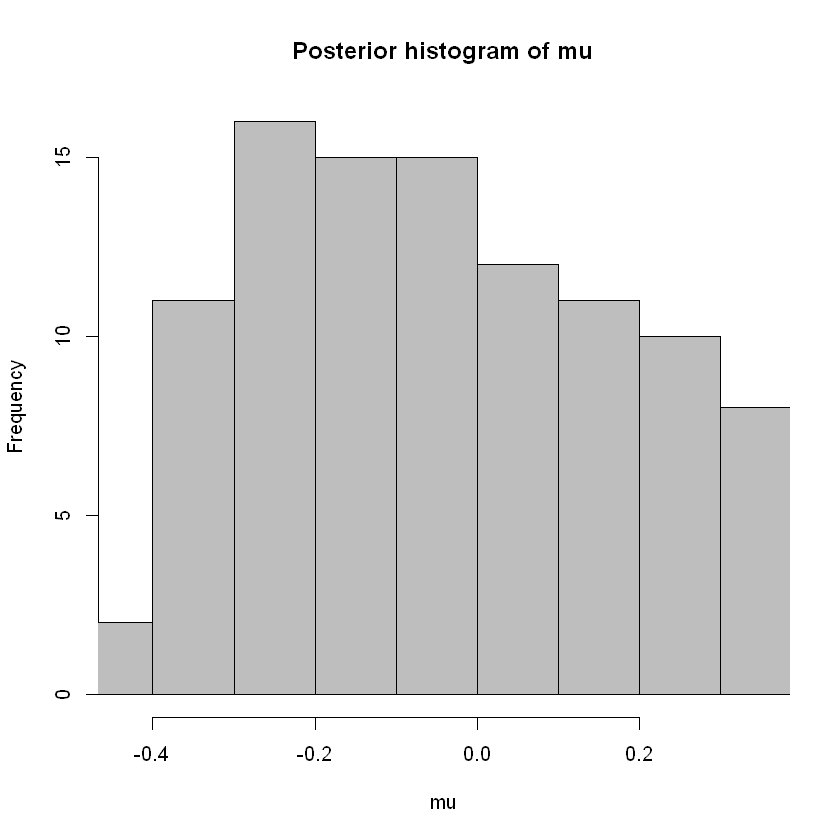

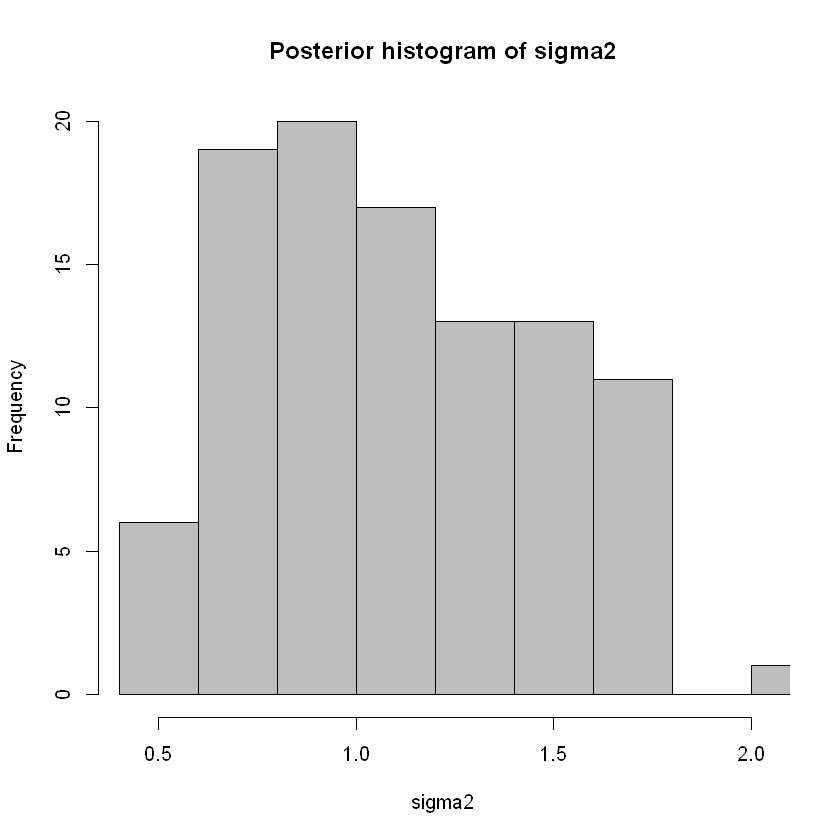

In [127]:
hist(rejection, breaks = 10);

[1] -0.03854441

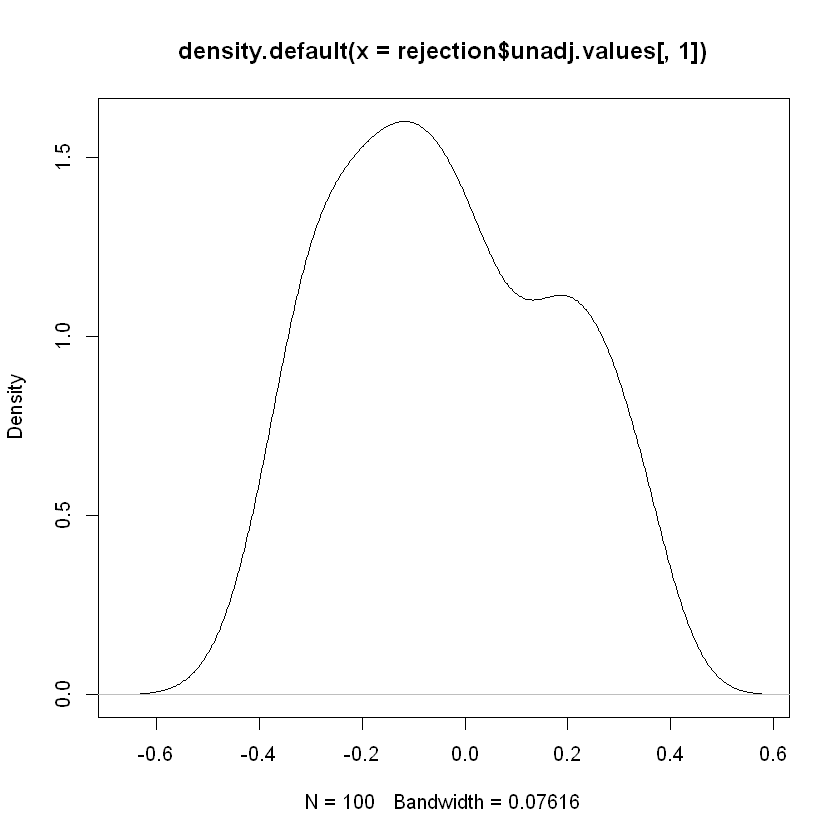

In [128]:
library(ggplot2)
#Graficar la densidad de mu
den = density(rejection$unadj.values[,1])
mean(rejection$unadj.values[,1])
plot(den)

[1] 1.107756

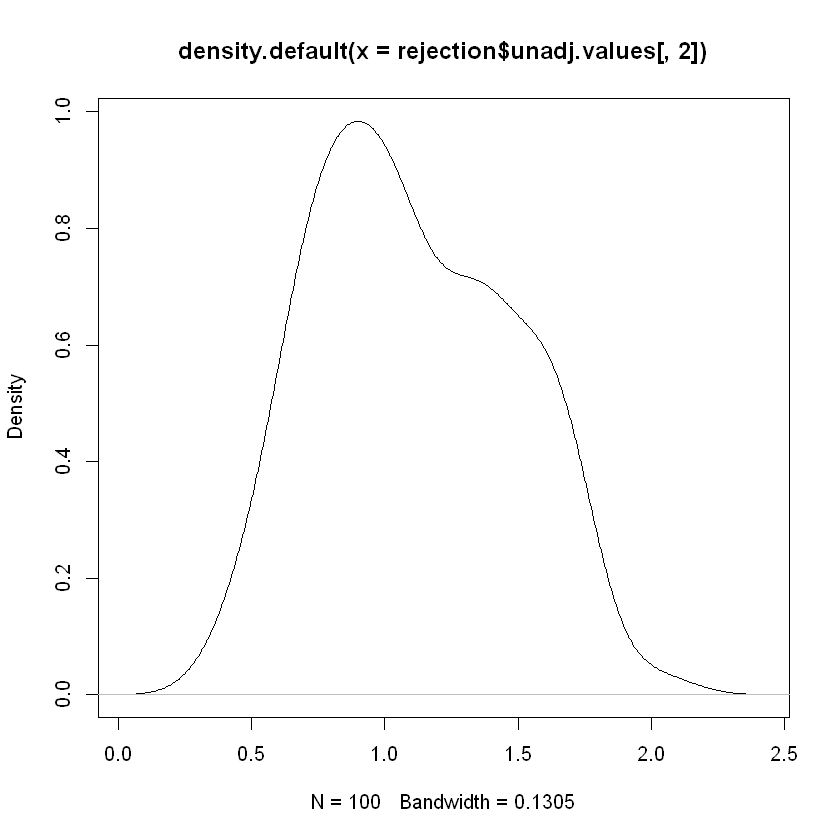

In [129]:
den = density(rejection$unadj.values[,2])
mean(rejection$unadj.values[,2])
plot(den)

## Ajustes posteriores al muestreo

Posterior distributions estimated with the rejection algorithm tend to be much broader than the true posterior distributions. This is shown for the normal model in Figure 1, but has been observed generally and is due to the often relatively large distance thresholds leading to parameter values resulting in
summary statistics rather distant from 𝑆𝑜𝑏𝑠 to be accepted. Obviously, this loss of precision can be reduced by being more restrictive in accepting simulations, but this may require unrealistically computational e
orts, particularly in more complex models.

An alternative is to correct for the effect of using large thresholds by exploiting the often simpler relationship between model parameters and summary statistics locally around the observed summary statistics. In a landmark paper, Beaumont et al. [2002] assume a linear relationship between model
parameters and summary statistics locally among the retained simulations and proposed to use this relationship to project the parameter values of all retained parameter values to 𝑆𝑜𝑏𝑠. More recently, Blum and Francois [2010] introduced an extension of this approach by fitting a non-linear, heteroscedastic model using neural networks. Both of these algorithms are implemented in the R package abc.

The two post-sampling adjustments implemented in the R package abc are used by simply choosing the appropriate method when calling the abc() function. There are three different methods available: loclinear, ridge and neuralnet, which correspond, respectively, to the classic regression adjustment introduced by Beaumont et al. [2002], a version of this algorithm using a ridge regression
to deal with extensive collinearity among statistics, and the non-linear, heteroscedastic regression proposed by Blum and Francois [2010]. When using the loclinear method, if a warning appears regarding the collinearity of the design matrix then we recommend to use the ridge method instead.

In [130]:
regression <- abc(S.obs,P.normal,S.normal,tol=0.01,method="ridge");
neural <- abc(S.obs,P.normal,S.normal,tol=0.01,method="neuralnet");

Warning message:
"All parameters are "none" transformed."


Warning message:
"All parameters are "none" transformed."


12345678910
12345678910


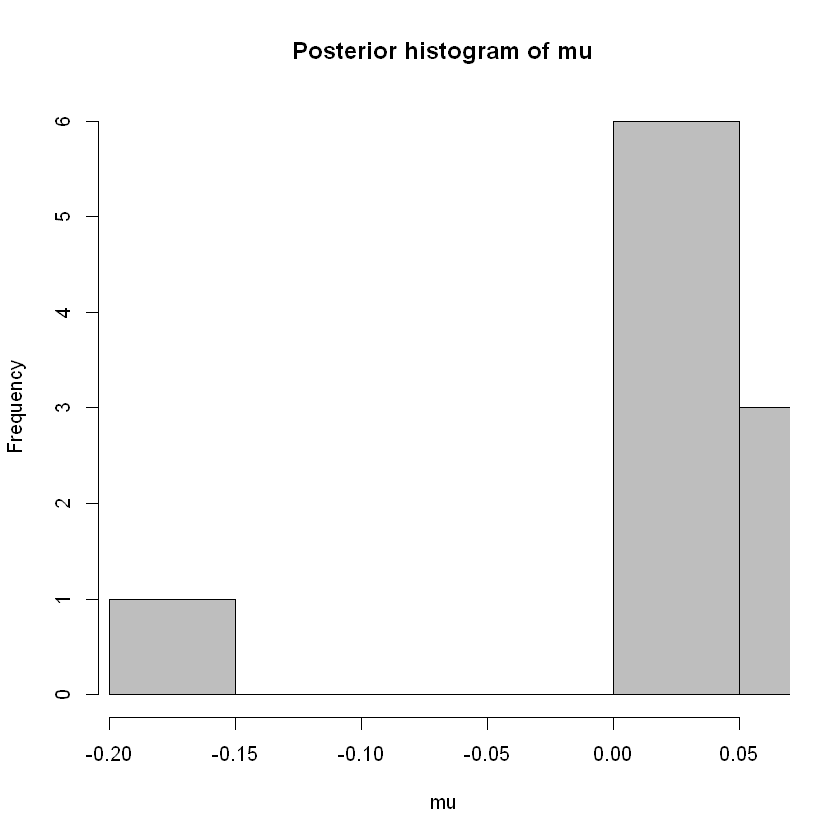

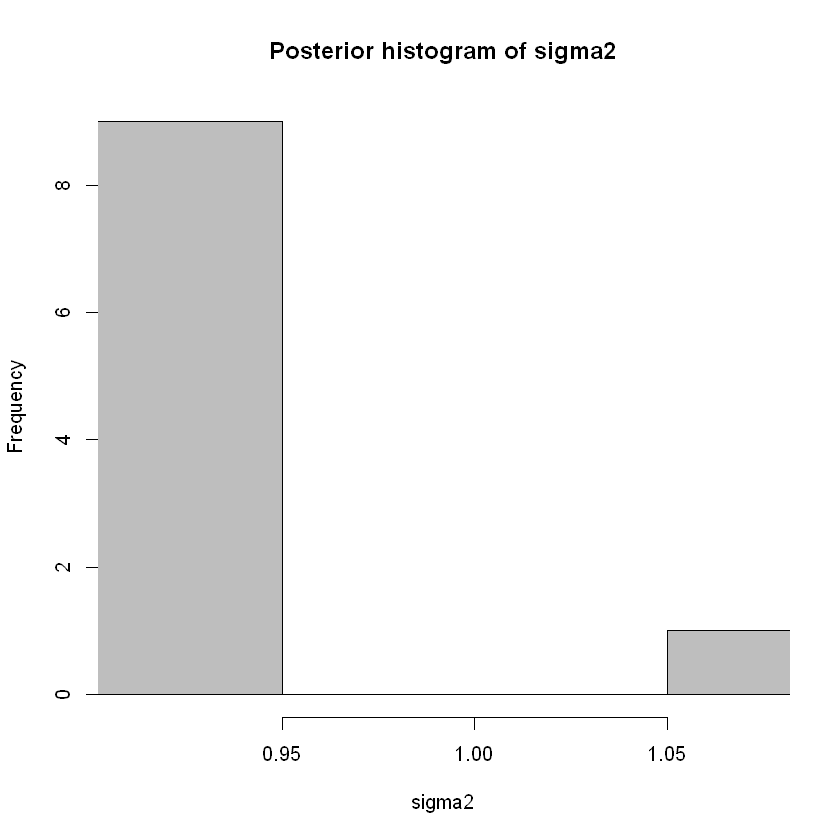

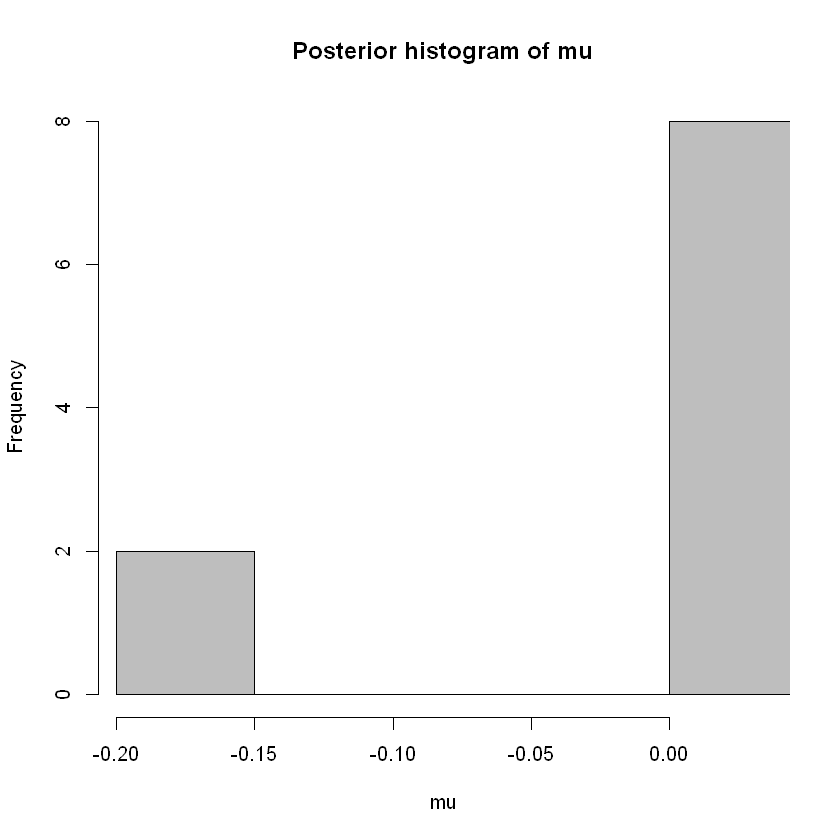

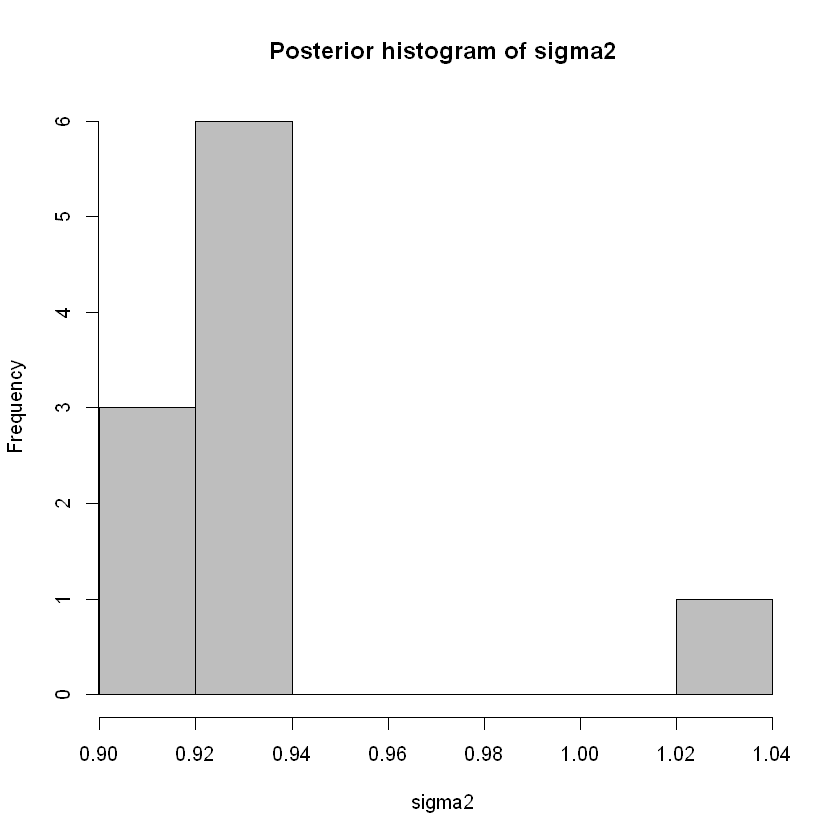

In [131]:
hist(regression);
hist(neural);

Another function provided by the package abc is plot.abc, which can be used to plot the densities of the estimated posterior distributions together with additional, informative plots such as the prior distribution, the distribution of euclidean distances, and the residuals of the regression. Since this
function overloads the standard R function plot(), it is simply used as follows:

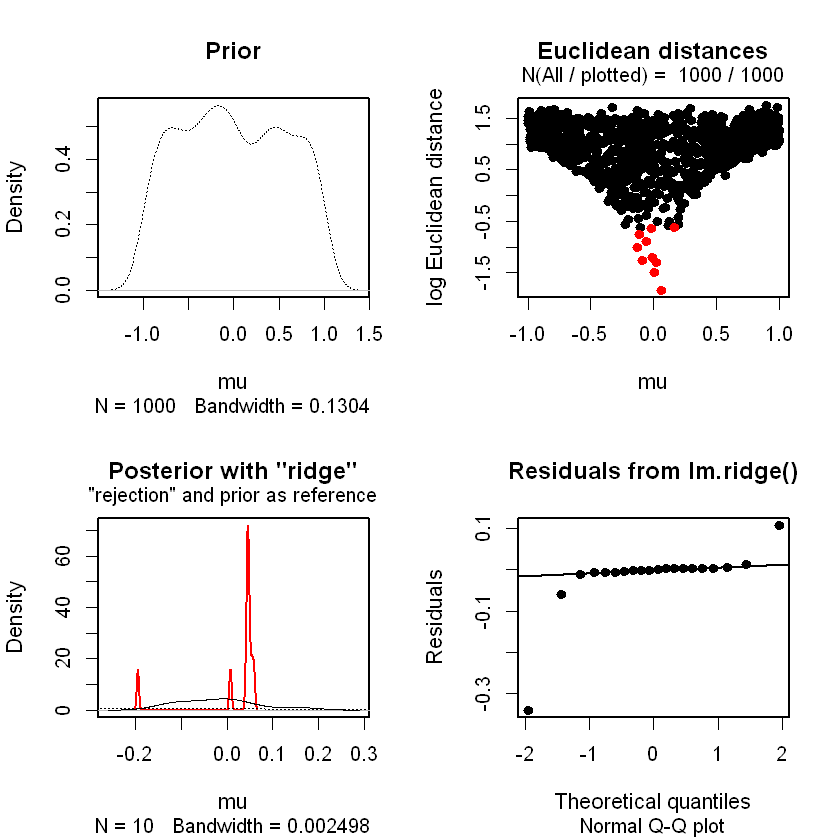

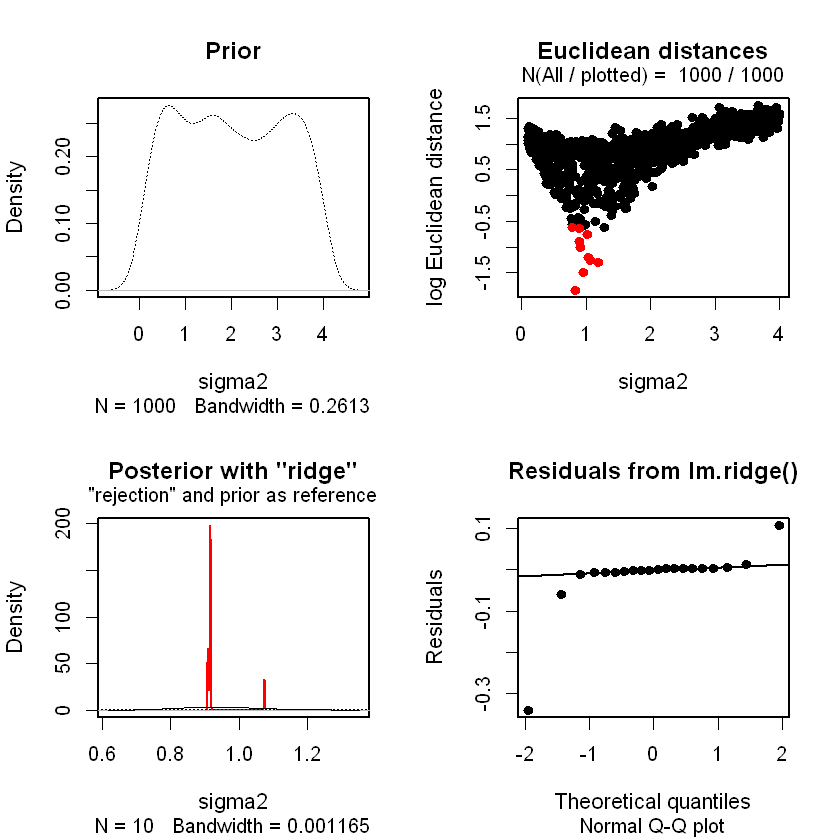

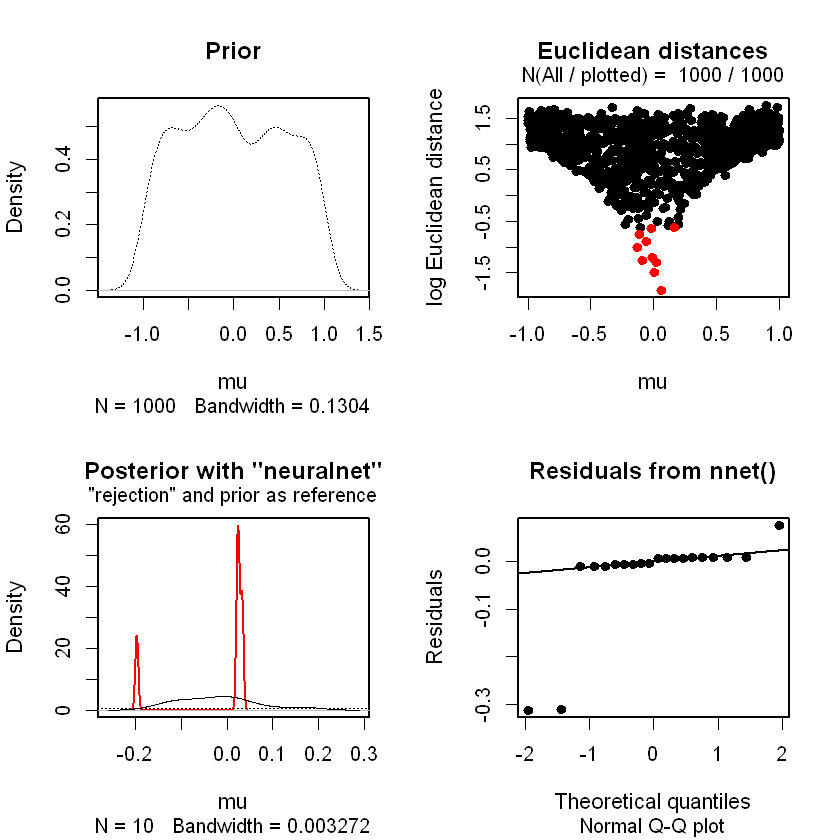

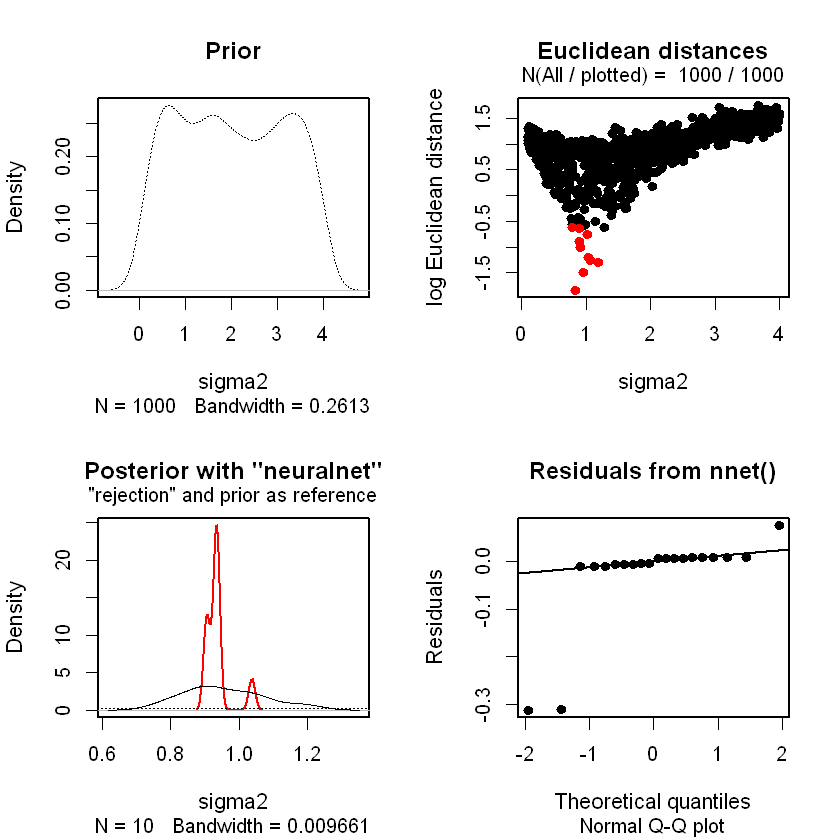

In [132]:
plot(regression,param=P.normal);
plot(neural,param=P.normal);

Alternatively, the estimated posterior distributions can also be plotted using the R function density. For that purpose, one has to access specific elements of the object returned by the abc() function, namely the projected model parameter values as adj.values as well as their weights. The following R commands, for instance, plot the posterior densities obtained via the
regression and neural network adjustment for 𝜇:

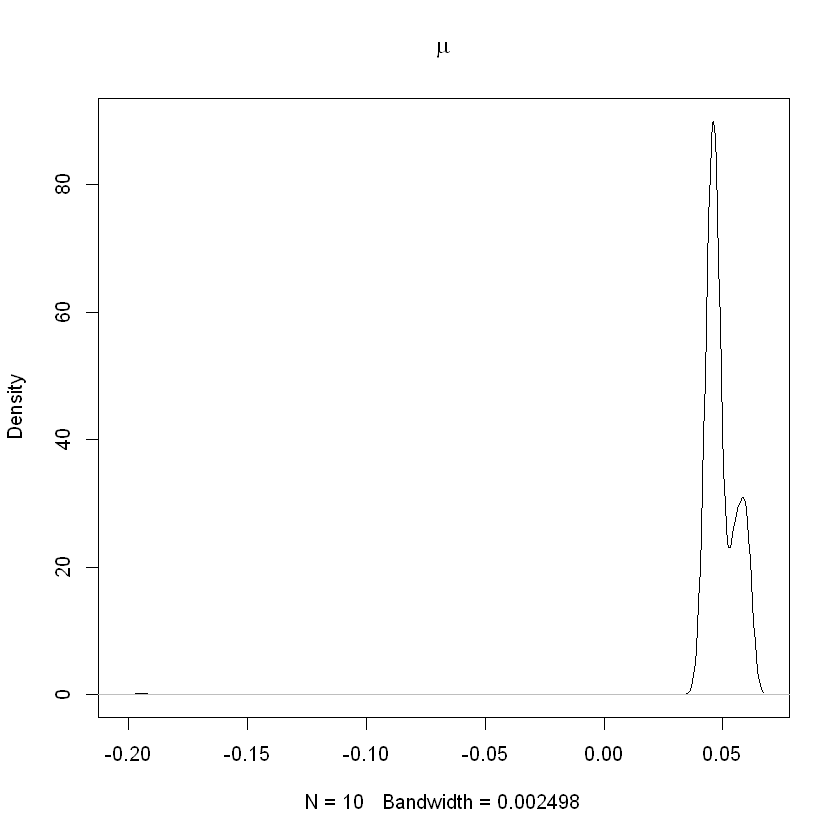

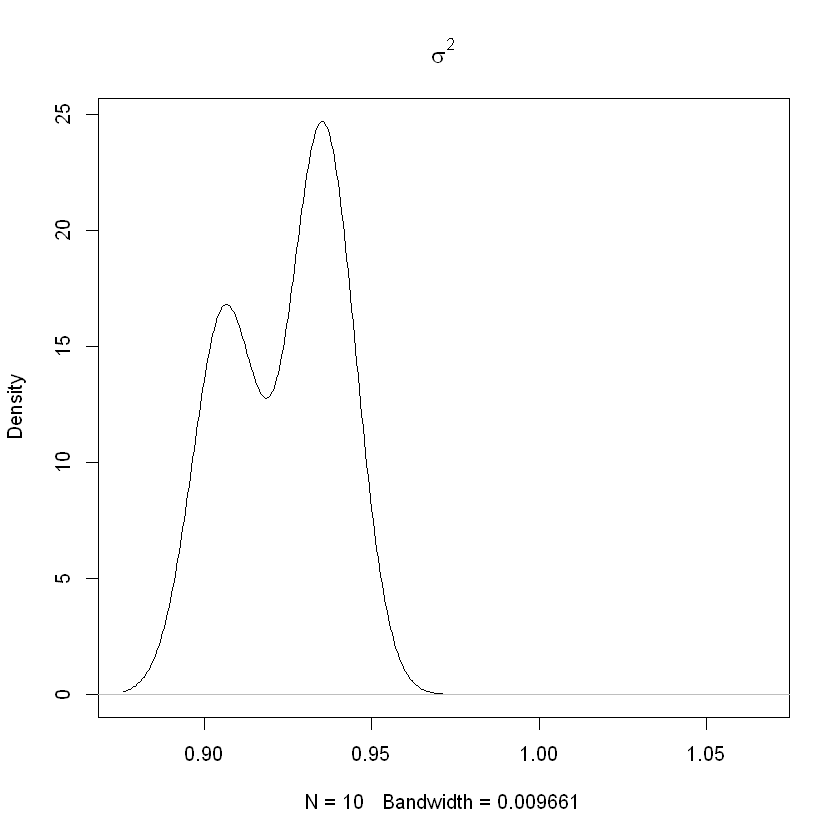

In [133]:
plot(density(regression$adj.values[,1], weights=regression$weights/sum(regression$weights)),main=
expression(mu));
plot(density(neural$adj.values[,2], weights=neural$weights/sum(neural$weights)),main=expression(sigma
^2));

Posterior distributions plotted using these functions are compared to those obtained through other methods in Figure 1. Note that the object returned also contains the retained model parameter values in the element unadj.values that can be used to plot the rejection posterior distribution.

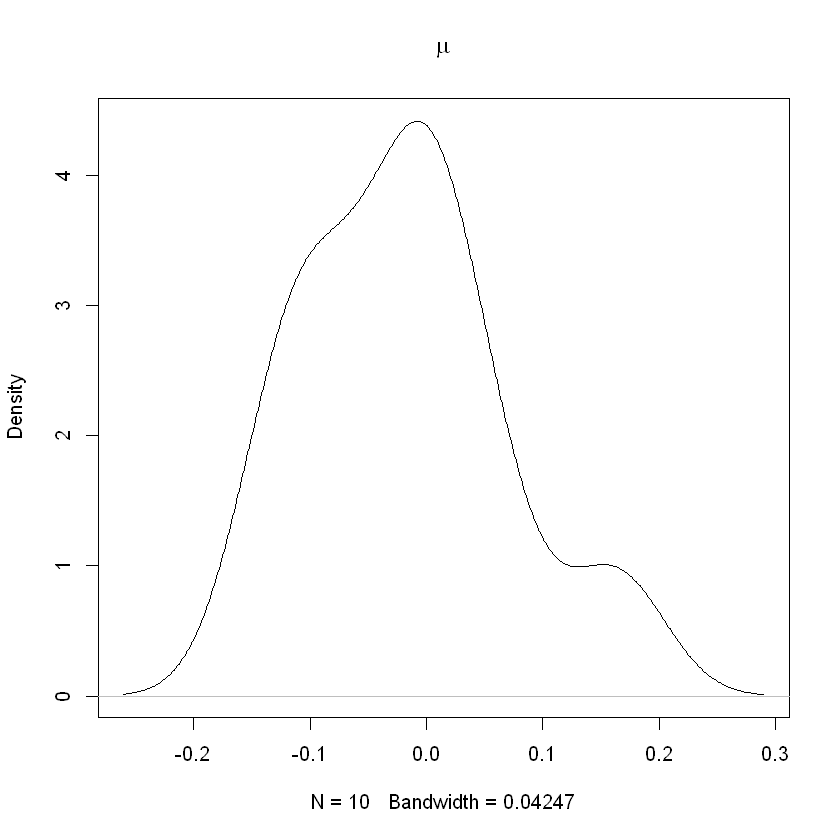

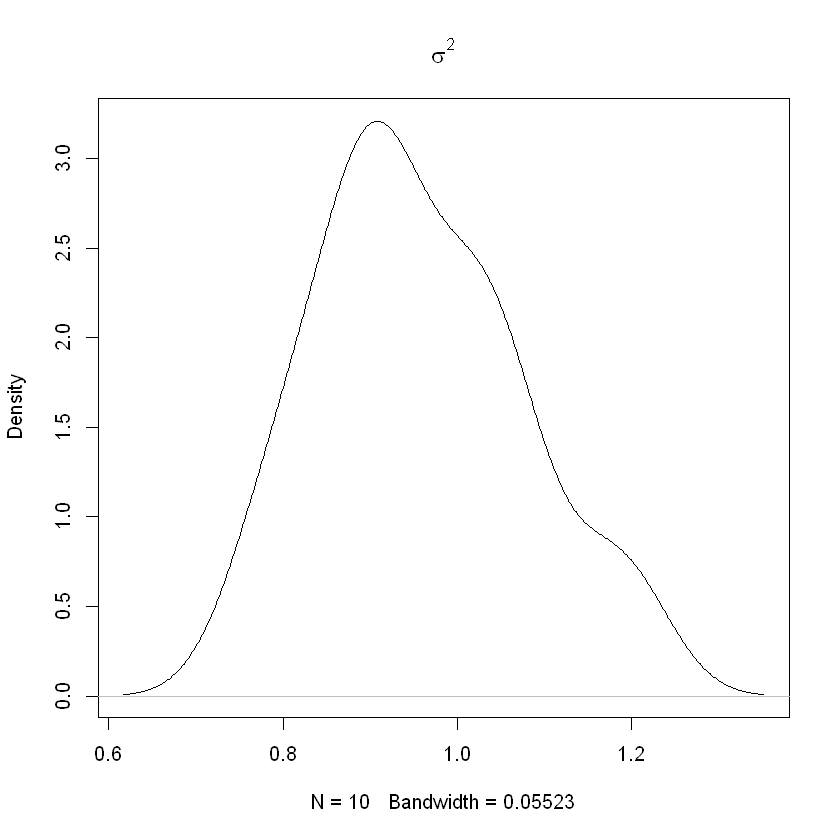

In [134]:

plot(density(regression$unadj.values[,1]),main=expression(mu));
plot(density(regression$unadj.values[,2]),main=expression(sigma^2));

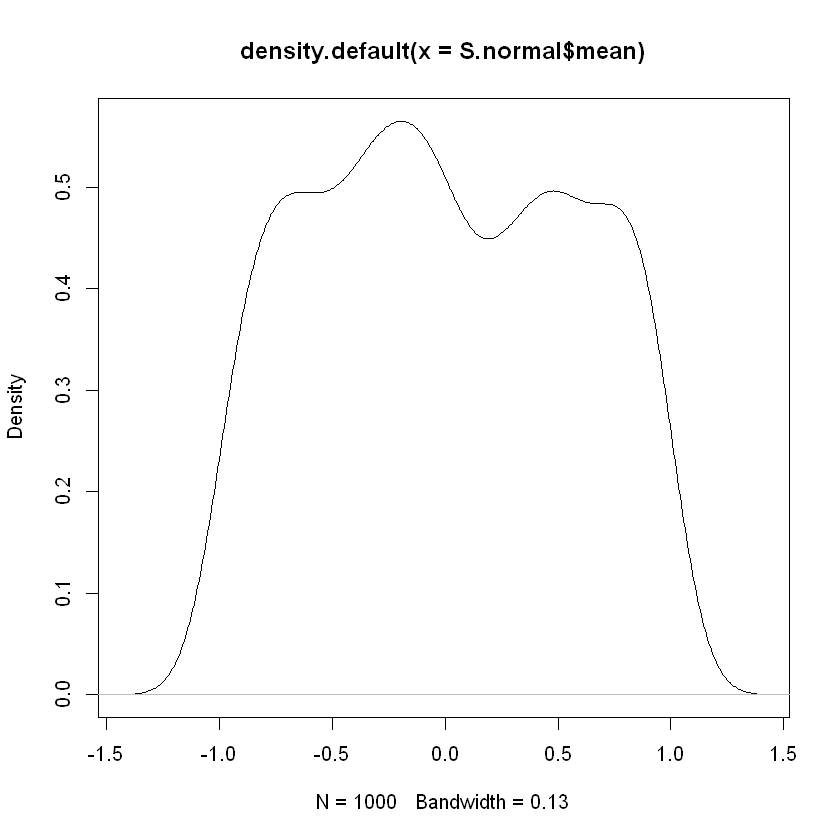

In [135]:
plot(density(S.normal$mean))

## ABC MCMC

In [136]:
library(EasyABC)

In [137]:
model <- function(x){
    samples <- rnorm(sampleSize,mean=x[1],sd=sqrt(x[2]))
    return(calc.stats(samples))
}

prior <- list(c("unif",-1,1),c("unif",0.1,4))



In [138]:
ABC_posterior.marjoram_original <- ABC_mcmc(method="Marjoram_original", model=model, prior=prior, summary_stat_target=S.obs, n_rec=1000);
length(ABC_posterior.marjoram$param[,1])

[1] "Warning: summary statistics are normalized by default through a division by the target summary statistics - it may not be appropriate to your case."
[1] "Consider providing normalization constants for each summary statistics in the option 'tab_normalization' or using the method 'Marjoram' which automatically determines these constants."
[1] "Warning: default values for proposal distributions are used - they may not be appropriate to your case."
[1] "Consider providing proposal range constants for each parameter in the option 'proposal_range' or using the method 'Marjoram' which automatically determines these constants."
[1] "Warning: a default value for the tolerance has been computed - it may not be appropriate to your case."
[1] "Consider providing a tolerance value in the option 'dist_max' or using the method 'Marjoram' which automatically determines this value."


[1] 1000

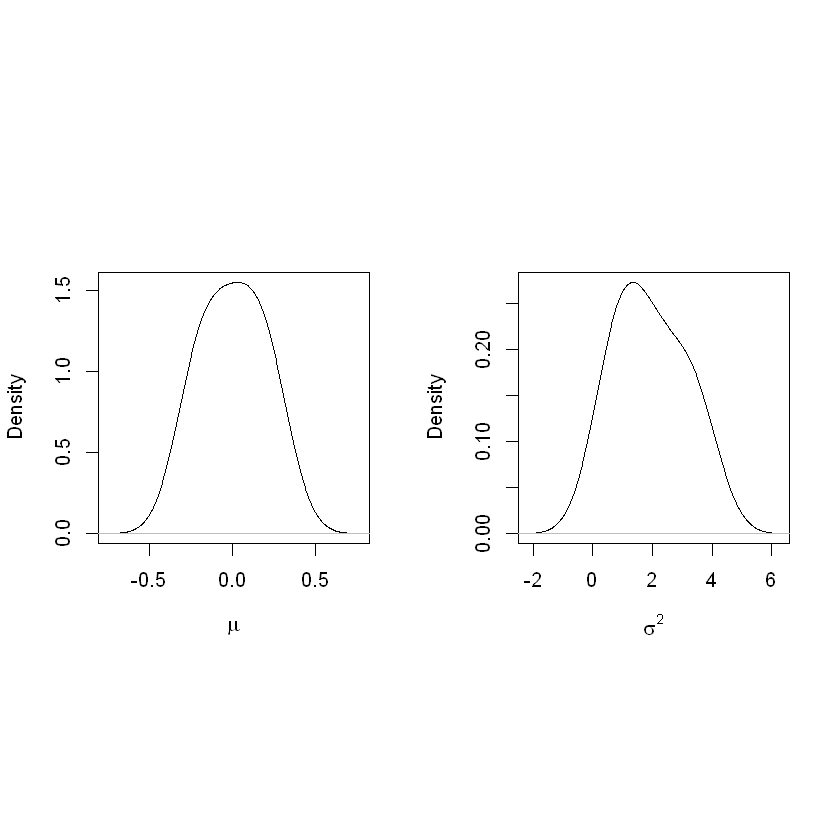

In [139]:
par(pty="s",mfrow=c(1,2));
plot(density(ABC_posterior.marjoram_original$param[,1],adjust=3),main="",xlab=expression(mu));
plot(density(ABC_posterior.marjoram_original$param[,2],adjust=3),main="",xlab=expression(sigma^2));

In [140]:
ABC_posterior.marjoram <- ABC_mcmc(method="Marjoram", model=model, prior=prior, summary_stat_target=S.obs, n_calibration=10000, n_rec=1000, tolerance_quantile=0.1);
length(ABC_posterior.marjoram$param[,1])

[1] 1000

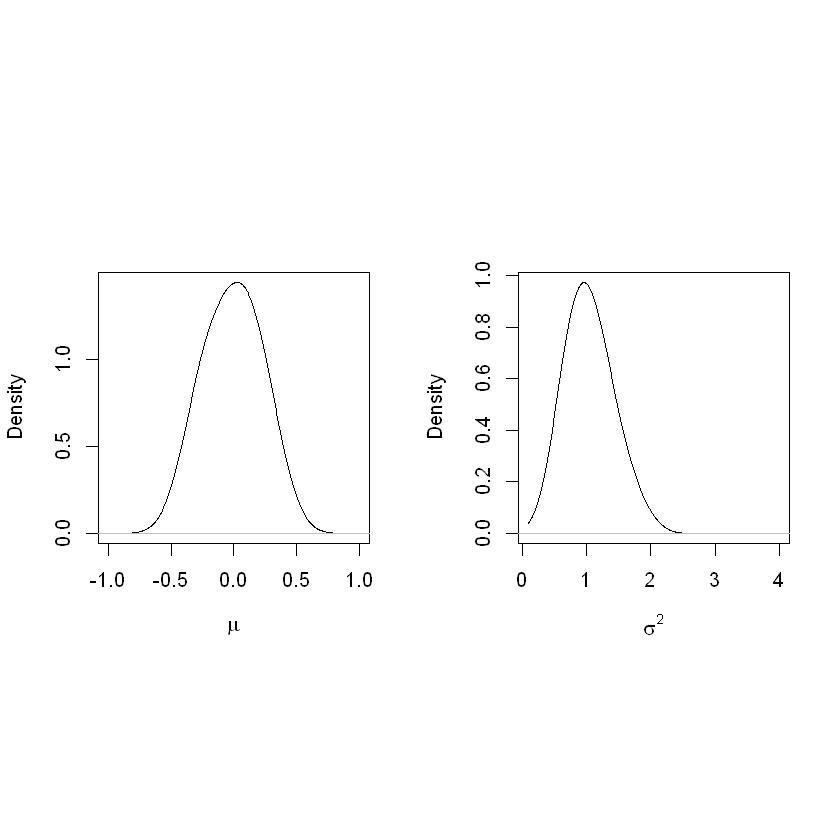

In [141]:
par(pty="s",mfrow=c(1,2));
plot(density(ABC_posterior.marjoram$param[,1],from=-1,to=1,adjust=3),main="",xlab=expression(mu));
plot(density(ABC_posterior.marjoram$param[,2],from=0.1,to=4,adjust=3),main="",xlab=expression(sigma^2));

In [2]:
n <- 100
intercept <- 10
slope     <- 1
s         <- 2.5
x <- runif(n,10,20)
y <- rnorm(n,intercept+slope*x,s)

model <- lm(y~x)
intercept.data <- coef(model)[1]
slope.data <- coef(model)[2]
sd.data <- summary(model)$sigma

In [3]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0342 -1.6866  0.4135  1.8557  5.6487 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.28892    1.41712   7.966 3.00e-12 ***
x            0.91869    0.09366   9.808 3.15e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.708 on 98 degrees of freedom
Multiple R-squared:  0.4954,	Adjusted R-squared:  0.4902 
F-statistic:  96.2 on 1 and 98 DF,  p-value: 3.155e-16


In [6]:
sd.data

[1] 2.707979